In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\mihir\Desktop\portfolio projects\Python Portfolio project\Levels_Fyi_Salary_Data first clean.csv')
#Dataset from https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries

In [9]:
pd.set_option("display.max_rows", 101)
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_columns', None)
df.head()
#First look at the dataset

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,NaN,7392,807.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,NaN,7419,807.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,NaN,11527,819.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,NaN,7472,807.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,NaN,7322,807.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [10]:
#Checking for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

timestamp - 0.0%
company - 7.982120051085569e-05%
title - 0.0%
totalyearlycompensation - 0.0%
location - 0.0%
yearsofexperience - 0.0%
yearsatcompany - 0.0%
basesalary - 0.0%
stockgrantvalue - 0.0%
bonus - 0.0%
gender - 0.31192528735632186%
cityid - 0.0%
dmaid - 3.192848020434228e-05%
Masters_Degree - 0.0%
Bachelors_Degree - 0.0%
Doctorate_Degree - 0.0%
Highschool - 0.0%
Some_College - 0.0%
Race_Asian - 0.0%
Race_White - 0.0%
Race_Two_Or_More - 0.0%
Race_Black - 0.0%
Race_Hispanic - 0.0%
Race - 0.6419699872286079%
Education - 0.5151660280970626%


In [11]:
df.dtypes

timestamp                   object
company                     object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
basesalary                   int64
stockgrantvalue            float64
bonus                      float64
gender                      object
cityid                       int64
dmaid                      float64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
Race                        object
Education                   object
dtype: object

In [12]:
#Changing timestamp to only date since time isn't necessary
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date
df.head()

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,2017-06-07,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,NaN,7392,807.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,2017-06-10,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,NaN,7419,807.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,2017-06-11,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,NaN,11527,819.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,2017-06-17,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,NaN,7472,807.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,2017-06-20,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,NaN,7322,807.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [13]:
df = df.sort_values(by=['totalyearlycompensation'], inplace = False, ascending = False) 
df.head()

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
61989,2021-07-30,Facebook,Product Manager,4980000,"Menlo Park, CA",17.0,0.0,380000,4400.0,200000.0,Male,7300,807.0,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
61965,2019-08-20,Microsoft,Software Engineering Manager,4950000,"Redmond, WA",24.0,8.0,850000,3750.0,350000.0,Male,11521,819.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
61980,2021-03-09,Google,Product Manager,4500000,"San Francisco, CA",20.0,14.0,450000,3700.0,350000.0,Male,7419,807.0,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
61988,2021-07-02,Facebook,Software Engineer,4490000,"Menlo Park, CA",13.0,9.0,350000,4000.0,140000.0,NaN,7300,807.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
61967,2019-09-28,Snap,Software Engineering Manager,2500000,"Los Angeles, CA",20.0,4.0,400000,2100.0,0.0,Male,7275,803.0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


#Corelation of totalyearlycompensation and other columns
#Years of experience, base salary, stock grant value, bonus,  years at company, masters degree, doctorate degree will have a postive corelation.

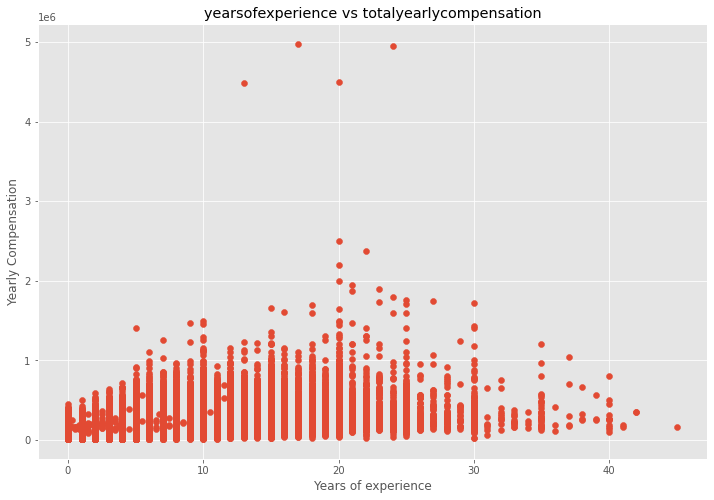

In [14]:
#Scatter plot for yearsofexperience and totalyearlycompensation
plt.scatter(x = df['yearsofexperience'], y = df['totalyearlycompensation'])
plt.title('yearsofexperience vs totalyearlycompensation')
plt.xlabel('Years of experience')
plt.ylabel('Yearly Compensation')
plt.show()

Text(0, 0.5, 'Total Yearly Compensation')

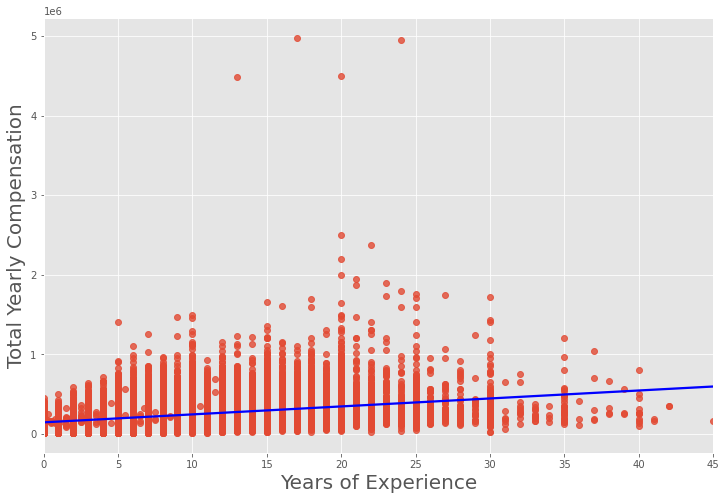

In [15]:
#Plotting regression plot for yearsofexperience and totalyearlycompensation
plt1 = sns.regplot(x = 'yearsofexperience', y = 'totalyearlycompensation', data = df, line_kws={"color":"blue"})
plt1.set_xlabel("Years of Experience", fontsize = 20)
plt1.set_ylabel("Total Yearly Compensation", fontsize = 20)


Text(0, 0.5, 'Total Yearly Compensation')

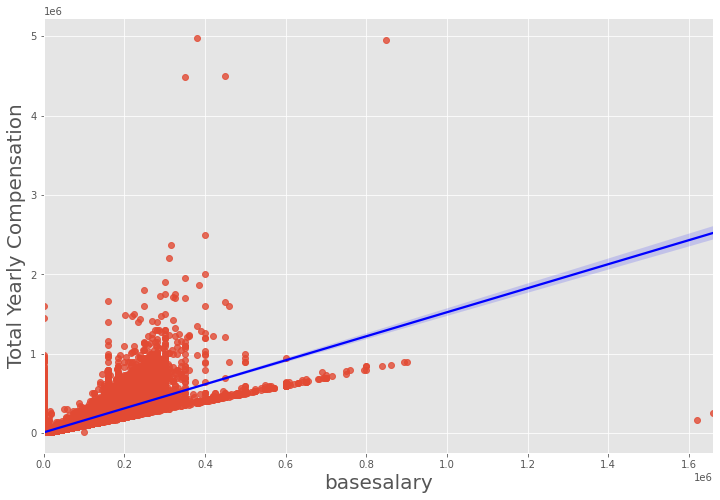

In [16]:
#Plotting regression plot for basesalary and totalyearlycompensation
plt1 = sns.regplot(x = 'basesalary', y = 'totalyearlycompensation', data = df, line_kws={"color":"blue"})
plt1.set_xlabel("basesalary", fontsize = 20)
plt1.set_ylabel("Total Yearly Compensation", fontsize = 20)


Text(0, 0.5, 'Total Yearly Compensation')

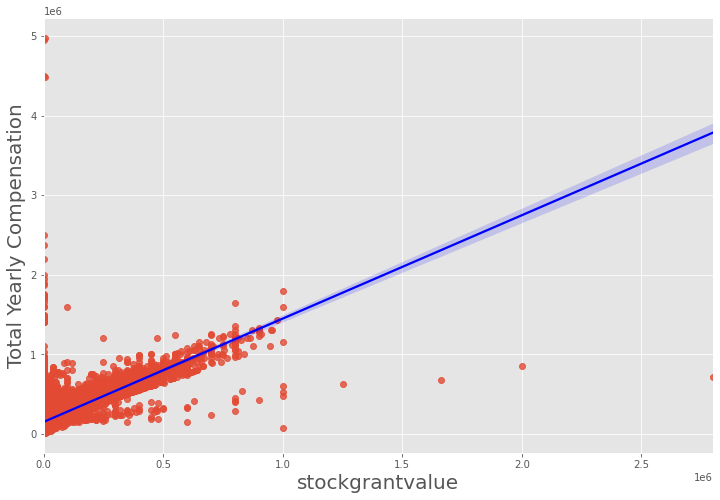

In [17]:
#Plotting regression plot for stockgrantvalue and totalyearlycompensation
plt1 = sns.regplot(x = 'stockgrantvalue', y = 'totalyearlycompensation', data = df, line_kws={"color":"blue"})
plt1.set_xlabel("stockgrantvalue", fontsize = 20)
plt1.set_ylabel("Total Yearly Compensation", fontsize = 20)


Text(0, 0.5, 'Total Yearly Compensation')

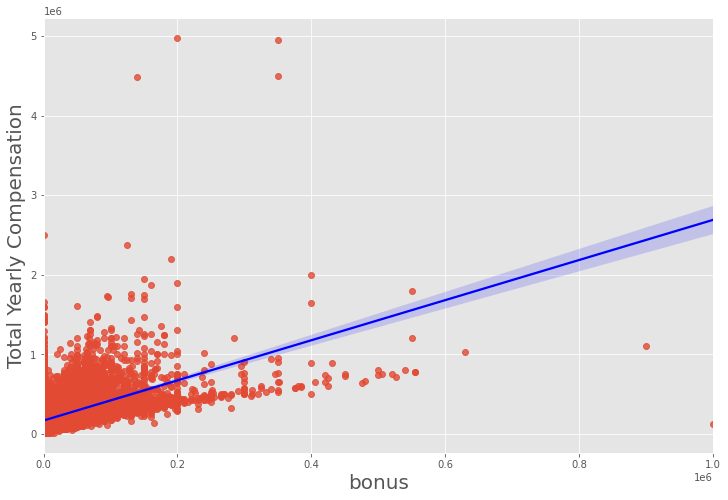

In [18]:
#Plotting regression plot for bonus and totalyearlycompensation
plt1 = sns.regplot(x = 'bonus', y = 'totalyearlycompensation', data = df, line_kws={"color":"blue"})
plt1.set_xlabel("bonus", fontsize = 20)
plt1.set_ylabel("Total Yearly Compensation", fontsize = 20)


Text(0, 0.5, 'Total Yearly Compensation')

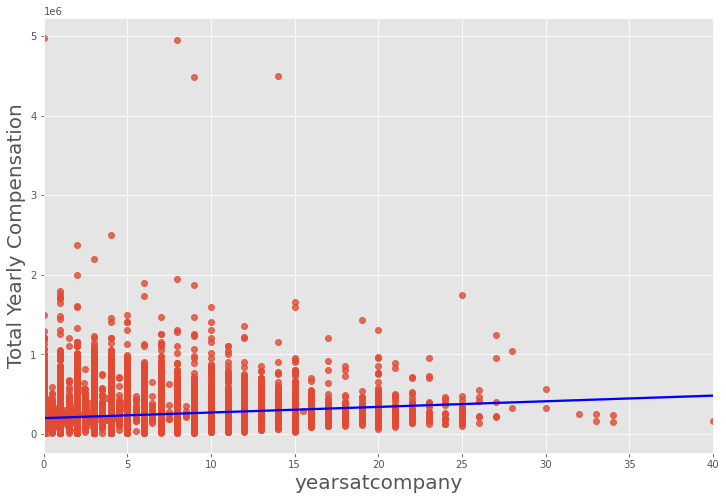

In [19]:
#Plotting regression plot for yearsatcompany and totalyearlycompensation
plt1 = sns.regplot(x = 'yearsatcompany', y = 'totalyearlycompensation', data = df, line_kws={"color":"blue"})
plt1.set_xlabel("yearsatcompany", fontsize = 20)
plt1.set_ylabel("Total Yearly Compensation", fontsize = 20)


In [20]:
#Looking at correlations
df.corr(method = 'pearson')

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
totalyearlycompensation,1.000000,0.423408,0.166622,0.672866,0.770754,0.489450,-0.110181,0.376343,0.018312,-0.139875,0.097177,-0.014832,-0.003381,-0.080080,-0.027808,-0.009624,-0.026743,-0.026147
yearsofexperience,0.423408,1.000000,0.521364,0.374867,0.290003,0.261428,-0.014471,0.030991,0.060473,-0.069435,-0.005352,0.011629,0.037974,-0.052616,0.064844,-0.013908,-0.022676,-0.002208
yearsatcompany,0.166622,0.521364,1.000000,0.146269,0.089987,0.108721,0.002322,0.044208,0.026385,-0.027411,0.001226,-0.005943,0.005762,-0.025814,0.047551,-0.014938,-0.027869,-0.007491
basesalary,0.672866,0.374867,0.146269,1.000000,0.468268,0.394358,-0.118641,0.425341,0.084229,-0.104111,0.104321,-0.008534,0.006494,-0.053759,0.020324,0.002090,-0.008836,-0.008976
stockgrantvalue,0.770754,0.290003,0.089987,0.468268,1.000000,0.248145,-0.072411,0.227605,0.010712,-0.084684,0.080766,-0.008618,-0.001779,-0.040446,-0.020983,-0.006073,-0.029246,-0.020414
bonus,0.489450,0.261428,0.108721,0.394358,0.248145,1.000000,-0.036092,0.143504,0.031525,-0.062893,0.071841,-0.006917,-0.001874,-0.023008,-0.007806,0.001771,-0.004029,-0.006987
cityid,-0.110181,-0.014471,0.002322,-0.118641,-0.072411,-0.036092,1.000000,-0.104863,-0.012880,0.053956,-0.018679,-0.012250,-0.005336,0.056164,-0.019082,-0.002994,0.012551,-0.003169
dmaid,0.376343,0.030991,0.044208,0.425341,0.227605,0.143504,-0.104863,1.000000,0.003322,-0.159574,0.040339,-0.038119,-0.009232,-0.093972,-0.087131,-0.009182,-0.005077,-0.010163
Masters_Degree,0.018312,0.060473,0.026385,0.084229,0.010712,0.031525,-0.012880,0.003322,1.000000,-0.286095,-0.076075,-0.040898,-0.043088,0.305897,0.036545,0.011021,0.014021,0.002327
Bachelors_Degree,-0.139875,-0.069435,-0.027411,-0.104111,-0.084684,-0.062893,0.053956,-0.159574,-0.286095,1.000000,-0.086407,-0.035966,-0.037893,0.249840,0.352616,0.110798,0.104208,0.137805


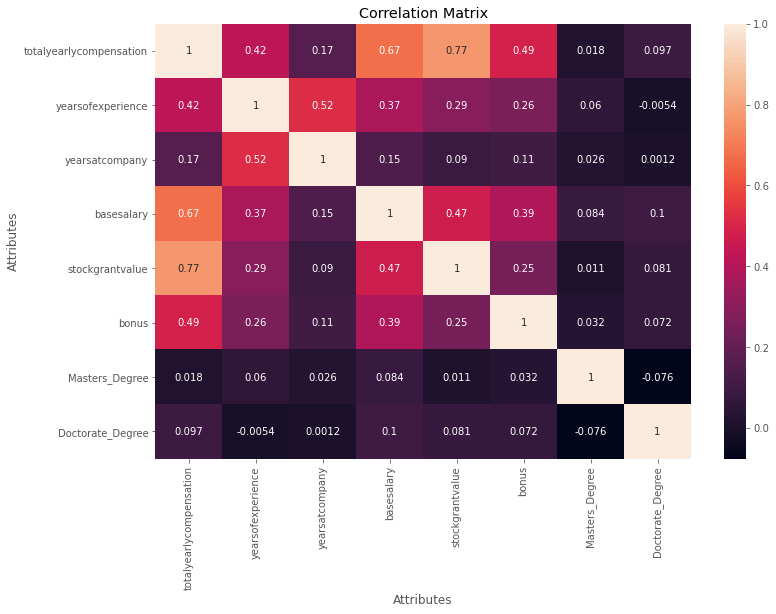

In [21]:
#Creating a new df with columns that have a positive correlation
df_positive = df[['totalyearlycompensation','yearsofexperience', 'yearsatcompany',
                         'basesalary', 'stockgrantvalue', 'bonus', 'Masters_Degree', 'Doctorate_Degree']]
#Creating a correlation matrix for the above df
matrix = df_positive.corr(method = 'pearson')
sns.heatmap(matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Attributes')
plt.ylabel('Attributes')
plt.show()

In [22]:
#Looking at looking at columns from the above mamtrix that have the highest correlation with totalyearlycompensation
pairs = matrix.unstack()
x = pairs.sort_values()
x[('totalyearlycompensation')].sort_values(ascending = False)

totalyearlycompensation    1.000000
stockgrantvalue            0.770754
basesalary                 0.672866
bonus                      0.489450
yearsofexperience          0.423408
yearsatcompany             0.166622
Doctorate_Degree           0.097177
Masters_Degree             0.018312
dtype: float64

Interesting findings:


1. Stock grant value has the highest correlation with yearly compensation. This could mean that the companies that have the most compensation give a lot of it through stocks and shares on the company.

2. Base salary and bonus have high corelation with yearly compensation as expected.

3. The more the experience you have in the field, the more paid you get. This is true in most cases and this can be seen with the corelation findings too.

4. The most surprising fact is the low corelation with masters and doctorate degree. One would expect that the more qualified a person is, the more compensation they get. However, this doesn't seem to be the case here. This goes to show that your skills and experience matters more than your qualifications.